In [1]:
import os


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
os.chdir('C:/Users/basleal/Desktop/tutorial/kaim-week-6')
print(os.getcwd())

C:\Users\basleal\Desktop\tutorial\kaim-week-6


In [4]:
path = 'C:/Users/basleal/Desktop/tutorial/kaim-week-6/data/data_ready_train.csv'

In [5]:
data=pd.read_csv(path)

In [6]:
data.head()

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,0,0,0,0,0,1,0
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,1,0,0,0,0,0,0,1,0,0
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,0,0,0,0,0,1,0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,0,0,0,0,0,1,0,1,0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,1,0,0,0,0,0,0,1,0,0


In [7]:
data.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProviderId', 'ProductId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5'],
      dtype='object')

Now we calculate the rfms values of each user to classify them as good or bad

In [8]:
from scripts.default_estimator import normalize_columns,aggregate,calculate_rfms_score
rfms=aggregate(data)
rfms

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,0.090993
1,CustomerId_10,83,1,0.090993
2,CustomerId_1001,89,5,0.461397
3,CustomerId_1002,25,11,1.011418
4,CustomerId_1003,11,6,0.553309
...,...,...,...,...
3737,CustomerId_992,4,6,0.553309
3738,CustomerId_993,25,5,0.461397
3739,CustomerId_994,0,101,9.333077
3740,CustomerId_996,67,17,1.575276


These are our rfms values and we will use those to classify the bad vs good

In [9]:
#normalize our columns
rfms=normalize_columns(rfms)
rfms

,CustomerId,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled
0,CustomerId_1,83,1,0.090993,0.922222,0.000000,0.000048
1,CustomerId_10,83,1,0.090993,0.922222,0.000000,0.000048
2,CustomerId_1001,89,5,0.461397,0.988889,0.000978,0.001059
3,CustomerId_1002,25,11,1.011418,0.277778,0.002445,0.002560
4,CustomerId_1003,11,6,0.553309,0.122222,0.001222,0.001310
...,...,...,...,...,...,...,...
3737,CustomerId_992,4,6,0.553309,0.044444,0.001222,0.001310
3738,CustomerId_993,25,5,0.461397,0.277778,0.000978,0.001059
3739,CustomerId_994,0,101,9.333077,0.000000,0.024450,0.025279
3740,CustomerId_996,67,17,1.575276,0.744444,0.003912,0.004100


In [10]:
#Compute RFMS score and classify
rfms = calculate_rfms_score(rfms)
rfms

,CustomerId,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled,RFMS_Score,Classification
0,CustomerId_1,83,1,0.090993,0.922222,0.000000,0.000048,0.368903,Good
1,CustomerId_10,83,1,0.090993,0.922222,0.000000,0.000048,0.368903,Good
2,CustomerId_1001,89,5,0.461397,0.988889,0.000978,0.001059,0.396167,Good
3,CustomerId_1002,25,11,1.011418,0.277778,0.002445,0.002560,0.112613,Good
4,CustomerId_1003,11,6,0.553309,0.122222,0.001222,0.001310,0.049649,Bad
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,4,6,0.553309,0.044444,0.001222,0.001310,0.018537,Bad
3738,CustomerId_993,25,5,0.461397,0.277778,0.000978,0.001059,0.111722,Good
3739,CustomerId_994,0,101,9.333077,0.000000,0.024450,0.025279,0.014919,Bad
3740,CustomerId_996,67,17,1.575276,0.744444,0.003912,0.004100,0.300181,Good


As we can see we have classified our data as good vs bad

We need to merge it with our data again

In [11]:
data = data.merge(rfms[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Classification']], on='CustomerId', how='left')
data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,90,0,119,10.947603,Bad
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,90,0,119,10.947603,Bad
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,1,0,90,81,2,0.183915,Good
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,1,0,1,0,90,5,38,3.513670,Bad
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,0,1,0,0,90,5,38,3.513670,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,0,1,0,0,0,0,573,52.889535,Bad
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,0,0,43,3.957583,Bad
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,0,0,43,3.957583,Bad
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,1,0,0,1,0,0,0,524,48.240072,Bad


In [12]:
data

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,90,0,119,10.947603,Bad
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,90,0,119,10.947603,Bad
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,...,0,0,0,1,0,90,81,2,0.183915,Good
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,...,0,1,0,1,0,90,5,38,3.513670,Bad
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,...,0,0,1,0,0,90,5,38,3.513670,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,...,0,0,1,0,0,0,0,573,52.889535,Bad
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,...,0,0,0,1,0,0,0,43,3.957583,Bad
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,...,0,0,1,0,0,0,0,43,3.957583,Bad
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,...,1,0,0,1,0,0,0,524,48.240072,Bad


In [25]:
#save our data
data.to_csv('data_with_rfms.csv')

In [21]:
data.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProviderId', 'ProductId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'DaysSinceLast',
       'Classifications'],
      dtype='object')

In [69]:
aggregated_data = data.groupby('CustomerId').agg({
    'Recency': 'min',  # Most recent transaction
    'Frequency': 'sum',  # Total number of transactions
    'Monetary': 'sum'   # Total spending
}).reset_index()

In [70]:
aggregated_data

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,0.090993
1,CustomerId_10,83,1,0.090993
2,CustomerId_1001,89,25,2.306985
3,CustomerId_1002,25,121,11.125595
4,CustomerId_1003,11,36,3.319853
...,...,...,...,...
3737,CustomerId_992,4,36,3.319853
3738,CustomerId_993,25,25,2.306985
3739,CustomerId_994,0,10201,942.640733
3740,CustomerId_996,67,289,26.779687


In [71]:
from scripts.default_estimator import classify_risk_level,woe_binning
from sklearn.preprocessing import OrdinalEncoder
# Apply the classification function to create the 'Risk_Level' column
aggregated_data['Risk_Level'] = aggregated_data.apply(classify_risk_level, axis=1)
encoder = OrdinalEncoder(categories=[['Low','Medium','High']])
aggregated_data['Risk_Level_Ordinal'] = encoder.fit_transform(aggregated_data[['Risk_Level']])
aggregated_data.head(15)[['Risk_Level','Risk_Level_Ordinal','Recency','Frequency','Monetary']]

,Risk_Level,Risk_Level_Ordinal,Recency,Frequency,Monetary
0,High,2.0,83,1,0.090993
1,High,2.0,83,1,0.090993
2,High,2.0,89,25,2.306985
3,High,2.0,25,121,11.125595
4,High,2.0,11,36,3.319853
5,High,2.0,52,1,0.092096
6,High,2.0,46,81,7.485221
7,High,2.0,64,1,0.092004
8,High,2.0,81,1,0.094485
9,High,2.0,65,4,0.371324


In [72]:
aggregated_data.nunique()

CustomerId            3742
Recency                 91
Frequency              221
Monetary              2291
Risk_Level               3
Risk_Level_Ordinal       3
dtype: int64

In [18]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          3742 non-null   object 
 1   Recency             3742 non-null   int64  
 2   Frequency           3742 non-null   int64  
 3   Monetary            3742 non-null   float64
 4   Risk_Level          3742 non-null   object 
 5   Risk_Level_Ordinal  3742 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 175.5+ KB


In [73]:
aggregated_data= woe_binning(aggregated_data,'Recency','Risk_Level_Ordinal')
aggregated_data

,CustomerId,Recency,Frequency,Monetary,Risk_Level,Risk_Level_Ordinal,woe
0,CustomerId_1,83,1,0.090993,High,2.0,0.026538
1,CustomerId_10,83,1,0.090993,High,2.0,0.026538
2,CustomerId_1001,89,25,2.306985,High,2.0,0.026538
3,CustomerId_1002,25,121,11.125595,High,2.0,0.008549
4,CustomerId_1003,11,36,3.319853,High,2.0,0.010118
...,...,...,...,...,...,...,...
3737,CustomerId_992,4,36,3.319853,High,2.0,-0.040576
3738,CustomerId_993,25,25,2.306985,High,2.0,0.008549
3739,CustomerId_994,0,10201,942.640733,High,2.0,-0.040576
3740,CustomerId_996,67,289,26.779687,High,2.0,0.026538


In [74]:
aggregated_data

,CustomerId,Recency,Frequency,Monetary,Risk_Level,Risk_Level_Ordinal,woe
0,CustomerId_1,83,1,0.090993,High,2.0,0.026538
1,CustomerId_10,83,1,0.090993,High,2.0,0.026538
2,CustomerId_1001,89,25,2.306985,High,2.0,0.026538
3,CustomerId_1002,25,121,11.125595,High,2.0,0.008549
4,CustomerId_1003,11,36,3.319853,High,2.0,0.010118
...,...,...,...,...,...,...,...
3737,CustomerId_992,4,36,3.319853,High,2.0,-0.040576
3738,CustomerId_993,25,25,2.306985,High,2.0,0.008549
3739,CustomerId_994,0,10201,942.640733,High,2.0,-0.040576
3740,CustomerId_996,67,289,26.779687,High,2.0,0.026538


In [47]:
# Replace NaN with the mean of the 'woe' column
aggregated_data['woe'].fillna(aggregated_data['woe'].mean(), inplace=True)

C:\Users\basleal\AppData\Local\Temp\ipykernel_15680\4287699244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_data['woe'].fillna(aggregated_data['woe'].mean(), inplace=True)


In [75]:
aggregated_data.isnull().sum()

CustomerId            0
Recency               0
Frequency             0
Monetary              0
Risk_Level            0
Risk_Level_Ordinal    0
woe                   0
dtype: int64

In [49]:
aggregated_data.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Risk_Level',
       'Risk_Level_Ordinal', 'woe'],
      dtype='object')

In [76]:
aggregated_data['Risk_Level_Ordinal']=aggregated_data['Risk_Level_Ordinal'].astype(int)

Now we will build a model to predict the risk level

Prepare the Data

In [77]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Recency', 'Frequency', 'Monetary', 'woe']  # Include WoE-transformed variables
target = 'Risk_Level_Ordinal'
X = aggregated_data[features]  # Features
y = aggregated_data[target]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
X_test

,Recency,Frequency,Monetary,woe
3450,0,1600,147.557522,-0.040576
1114,0,4,0.373346,-0.040576
351,5,16,1.474265,-0.040576
1983,1,1936,178.150419,-0.040576
2321,15,1,0.092371,0.010118
...,...,...,...,...
3294,32,49,4.529412,0.012912
3654,74,9,0.839338,0.026538
3252,69,4,0.368658,0.026538
942,46,16,1.473897,0.022162


In [79]:
print(y_test.dtype)
print(y_test[:10])

int64
3450    2
1114    2
351     2
1983    2
2321    2
2148    2
93      2
358     2
3676    2
1233    2
Name: Risk_Level_Ordinal, dtype: int64


Build the Model

In [81]:
from sklearn.ensemble import RandomForestClassifier  # Use classifier instead of regressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9982190560997328
Confusion Matrix:
[[  25    0    1]
 [   0    4    0]
 [   0    1 1092]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00      1093

    accuracy                           1.00      1123
   macro avg       0.93      0.99      0.96      1123
weighted avg       1.00      1.00      1.00      1123



Make predictions on custom data

In [82]:
new_data = [[3, 2, 1000, 0.2]]  # Example of new data (Recency, Frequency, Monetary, WoE)
prediction = model.predict(new_data)
print(f"Predicted Risk Level: {prediction}")

Predicted Risk Level: [2]


c:\Users\basleal\Desktop\tutorial\kaim-week-6\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Our model seems to be doing well it even predicted well when we gave it a custom data which is a good thing

let's see which features are more important

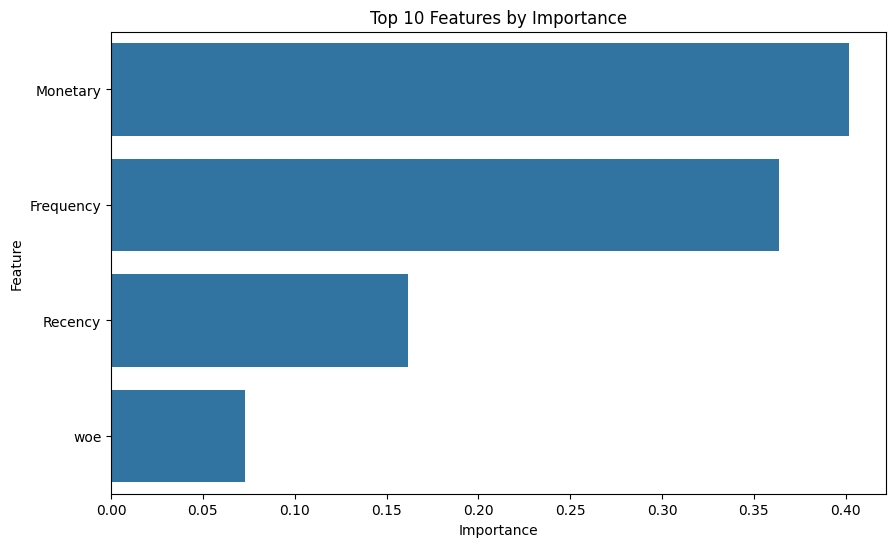

     Feature  Importance
2   Monetary    0.401841
1  Frequency    0.363594
0    Recency    0.161488
3        woe    0.073077


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from RandomForestClassifier
importances = model.feature_importances_

# Extract feature names (assuming X_train is a DataFrame)
features = X_train.columns

# Create a DataFrame to hold feature importance data
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features by Importance')
plt.show()

# Print the sorted importance DataFrame
print(importance_df)


In [13]:
data[['Recency','Frequency','Monetary']].to_csv('rfm_col.csv')

In [94]:
data.

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,TransactionStartTime,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,DaysSinceLast,Recency,Frequency,Monetary,Classification
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,5,ProductId_10,0.092004,0.000101,2018-11-15 02:18:49+00:00,...,0,0,0,1,0,90,0,119,10.947603,Bad
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,3,ProductId_6,0.091910,0.000002,2018-11-15 02:19:08+00:00,...,0,0,1,0,0,90,0,119,10.947603,Bad
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,5,ProductId_1,0.091958,0.000050,2018-11-15 02:44:21+00:00,...,0,0,0,1,0,90,81,2,0.183915,Good
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,ProductId_21,0.093750,0.002206,2018-11-15 03:32:55+00:00,...,0,1,0,1,0,90,5,38,3.513670,Bad
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,3,ProductId_6,0.091853,0.000065,2018-11-15 03:34:21+00:00,...,0,0,1,0,0,90,5,38,3.513670,Bad


In [95]:
aggregated_data.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Risk_Level',
       'Risk_Level_Ordinal', 'woe'],
      dtype='object')

In [96]:
merged_df = pd.merge(data, aggregated_data, on='CustomerId', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  ProviderId     ProductId    Amount     Value  \
0  CustomerId_4406           5  ProductId_10  0.092004  0.000101   
1  CustomerId_4406           3   ProductId_6  0.091910  0.000002   
2  CustomerId_4683           5   ProductId_1  0.091958  0.000050   
3   CustomerId_988           0  ProductId_21  0.093750  0.002206   
4   CustomerId_988           3   ProductId_6  0.091853  0.000065   

       TransactionStartTime  ...  Recency_x  Frequency_x  Monetary_x  \
0 2018-11-15 02:18:49+00:00  ...          0 

In [98]:
merged_df.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,Amount,Value,TransactionStartTime,...,Recency_x,Frequency_x,Monetary_x,Classification,Recency_y,Frequency_y,Monetary_y,Risk_Level,Risk_Level_Ordinal,woe
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,3,ProductId_6,0.091820,0.000101,2019-02-13 09:54:09+00:00,...,0,573,52.889535,Bad,0,328329,30305.703513,Low,0,-0.040576
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,5,ProductId_10,0.092004,0.000101,2019-02-13 09:54:25+00:00,...,0,43,3.957583,Bad,0,1849,170.176055,High,2,-0.040576
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,3,ProductId_6,0.091910,0.000002,2019-02-13 09:54:35+00:00,...,0,43,3.957583,Bad,0,1849,170.176055,High,2,-0.040576
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,5,ProductId_19,0.092188,0.000303,2019-02-13 10:01:10+00:00,...,0,524,48.240072,Bad,0,274576,25277.797807,Low,0,-0.040576
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,3,ProductId_6,0.091906,0.000006,2019-02-13 10:01:28+00:00,...,0,524,48.240072,Bad,0,274576,25277.797807,Low,0,-0.040576


In [99]:
merged_df.to_csv('data_to_train.csv')